<a href="https://colab.research.google.com/github/IvanRavarotto/ModelosNoSupervisados/blob/main/ModelosNoSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias y Data Set

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from google.colab import files
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import time

# Carga del dataset


uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))


Saving Cardiovascular_Disease_Dataset.csv to Cardiovascular_Disease_Dataset (1).csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividimos el dataset
Y = df['target']
X = df.drop(columns=['target', 'patientid'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Columnas booleanas que NO deben escalarse
columnas_booleanas = ['gender', 'fastingbloodsugar', 'exerciseangina']
columnas_numericas = [col for col in X_train.columns if col not in columnas_booleanas]

# Escalador
scaler = StandardScaler()

# Escalamos solo las columnas numéricas, manteniendo las booleanas iguales
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

#Rasignamos para mantener sus nombres originales
X_train = X_train_scaled
X_test = X_test_scaled


In [ ]:
from sklearn.cluster import KMeans

#Entrenamiento del modelo
start_time = time.time()

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')

kmeans.fit(X_train)

end_time = time.time()
training_timeK = end_time - start_time

print(f"Tiempo de entrenamiento de K-Means: {training_timeK:.4f} segundos")



Tiempo de entrenamiento de K-Means: 0.0595 segundos


Matriz de Confusión para la Agrupación K-Means:


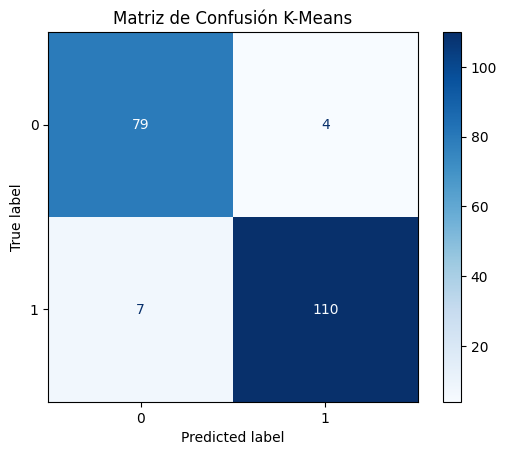

Porcentaje de Precisión de K-Means: 94.57%


In [ ]:
# Predecir las etiquetas de los clústeres para los datos de prueba escalados

start_time = time.time()
predicted_labels_kmeans = kmeans.predict(X_test)
end_time = time.time()

prediction_time_kmeans = end_time - start_time

cluster_mapping_kmeans = {}
for i in np.unique(predicted_labels_kmeans):
    # Obtener las etiquetas verdaderas para todos los puntos de datos asignados al clúster i
    labels_in_cluster = Y_test[predicted_labels_kmeans == i]
    # Encontrar la etiqueta verdadera más frecuente en este clúster
    if not labels_in_cluster.empty:
        most_frequent_label = labels_in_cluster.mode()[0]
        cluster_mapping_kmeans[i] = most_frequent_label
    else:
        # Manejar el caso en que un clúster podría estar vacío (poco probable con n_clusters=2)
        cluster_mapping_kmeans[i] = 0 # Valor por defecto 0 o manejar según sea necesario

mapped_predicted_labels = np.array([cluster_mapping_kmeans[label] for label in predicted_labels_kmeans])
cm_kmeans = confusion_matrix(Y_test, mapped_predicted_labels)
print("Matriz de Confusión para la Agrupación K-Means:")
display = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=np.unique(Y_test))
display.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión K-Means')
plt.show()

report_kmeans = classification_report(Y_test, mapped_predicted_labels, output_dict=True)
precision_kmeans = report_kmeans['weighted avg']['precision'] * 100

print(f"Porcentaje de Precisión de K-Means: {precision_kmeans:.2f}%")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


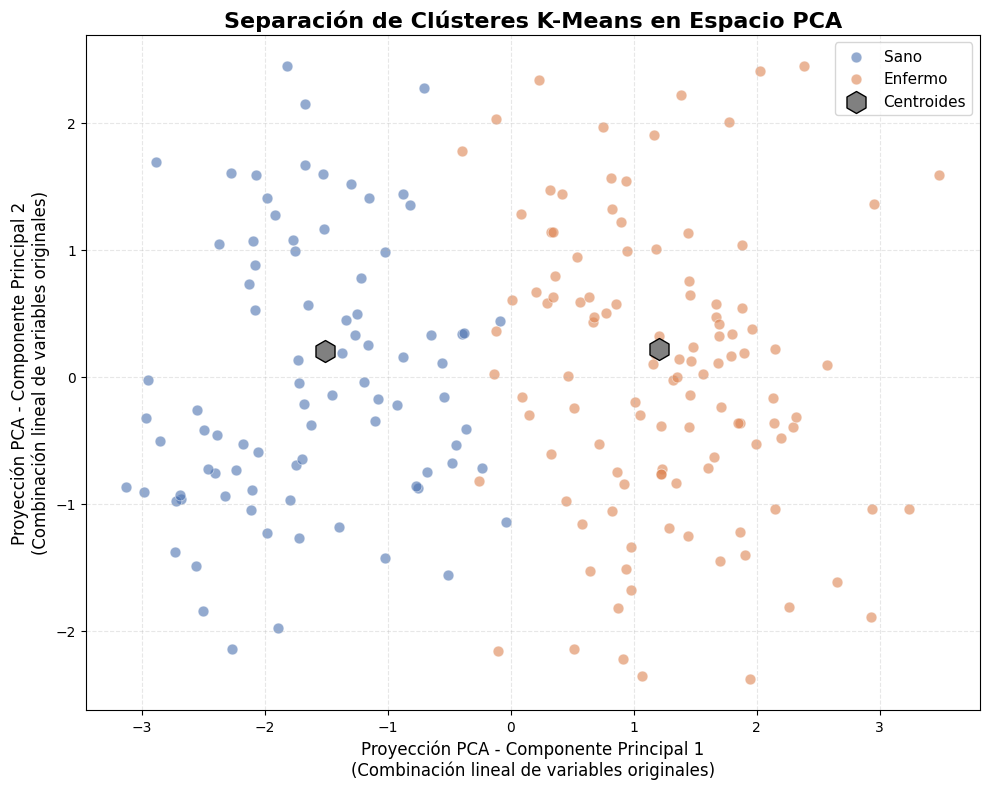

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Transformar los centroides al espacio PCA
centros_pca = pca.transform(kmeans.cluster_centers_)

# Crear gráfico de dispersión refinado
plt.figure(figsize=(10, 8))

# Grupo 0
plt.scatter(X_test_pca[predicted_labels_kmeans == 0, 0], X_test_pca[predicted_labels_kmeans == 0, 1],
            s=60, c='#4C72B0', label='Sano', alpha=0.6, edgecolors='white', linewidths=0.5)

# Grupo 1
plt.scatter(X_test_pca[predicted_labels_kmeans == 1, 0], X_test_pca[predicted_labels_kmeans == 1, 1],
            s=60, c='#DD8452', label='Enfermo', alpha=0.6, edgecolors='white', linewidths=0.5)

# Centroides como hexágonos grises
plt.scatter(centros_pca[:, 0], centros_pca[:, 1],
            s=250, c='gray', marker='h', edgecolor='black', label='Centroides')

# Estética y detalles
plt.title('Separación de Clústeres K-Means en Espacio PCA', fontsize=16, fontweight='bold')
plt.xlabel('Proyección PCA - Componente Principal 1\n(Combinación lineal de variables originales)', fontsize=12)
plt.ylabel('Proyección PCA - Componente Principal 2\n(Combinación lineal de variables originales)', fontsize=12)
plt.legend(frameon=True, fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Formulario del usuario
Edad = 27    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"          # @param ["0", "1", "2", "3"]
PresionArterial = 174     # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 321           # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "1"            # @param ["0", "1"]
Electrocardiograma = "1"  # @param ["0", "1", "2", "3"]
FrecuenciaCardiacaMaxima = 112  # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "1"       # @param ["0", "1"]
Depresion = 1.3           # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "1"           # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"     # @param ["0", "1", "2", "3"]

# Conversión de variables categóricas
Genero = 1 if Genero == "Masculino" else 0

# Construcción del DataFrame del usuario
datos_usuario = pd.DataFrame([{
    'age': Edad,
    'gender': Genero,
    'chestpain': int(DolorPecho),
    'restingBP': PresionArterial,
    'serumcholestrol': Clesterol,
    'fastingbloodsugar': int(Glucemia),
    'restingrelectro': int(Electrocardiograma),
    'maxheartrate': FrecuenciaCardiacaMaxima,
    'exerciseangia': int(AnginaDePecho),
    'oldpeak': Depresion,
    'slope': int(Pendiente),
    'noofmajorvessels': int(VasosCAfectados),
}])

# Validación institucional de columnas
assert list(datos_usuario.columns) == list(X_train.columns), \
    "Las columnas del usuario no coinciden con las del dataset"

# Validación de tipos numéricos
assert datos_usuario.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), \
    "El DataFrame del usuario contiene columnas no numéricas"

# Transformación del dato del usuario con el escalador ya entrenado
datos_usuario_escalado = datos_usuario.copy()
datos_usuario_escalado[columnas_numericas] = scaler.transform(datos_usuario[columnas_numericas])


# Predicción del grupo del usuario con el modelo ya entrenado
grupo_usuario = kmeans.predict(datos_usuario_escalado)

# Interpretación del resultado
if grupo_usuario[0] == 1:
    print("El usuario fue agrupado en el grupo 1. Tiene características similares a ese grupo.")
else:
    print("El usuario fue agrupado en el grupo 0. Tiene características similares a ese grupo.")

# Registro institucional del resultado
with open("log_clustering_usuario.txt", "a") as f:
    f.write(f"Edad: {Edad}, Grupo asignado: {grupo_usuario[0]}\n")

El usuario fue agrupado en el grupo 0. Tiene características similares a ese grupo.


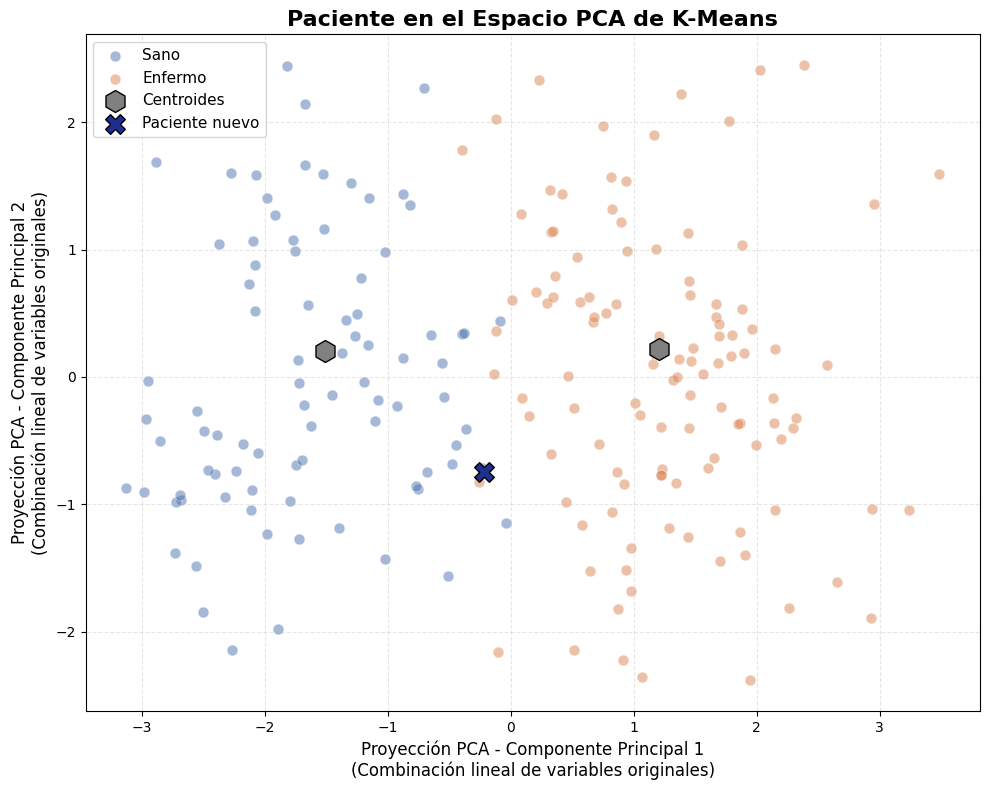

In [ ]:
# Proyectar el paciente en el espacio PCA
usuario_pca = pca.transform(datos_usuario_escalado)

# Crear gráfico
plt.figure(figsize=(10, 8))

# Grupo 0
plt.scatter(X_test_pca[predicted_labels_kmeans == 0, 0], X_test_pca[predicted_labels_kmeans == 0, 1],
            s=60, c='#4C72B0', label='Sano', alpha=0.5, edgecolors='white', linewidths=0.5)

# Grupo 1
plt.scatter(X_test_pca[predicted_labels_kmeans == 1, 0], X_test_pca[predicted_labels_kmeans == 1, 1],
            s=60, c='#DD8452', label='Enfermo', alpha=0.5, edgecolors='white', linewidths=0.5)

# Centroides
plt.scatter(centros_pca[:, 0], centros_pca[:, 1],
            s=250, c='gray', marker='h', edgecolor='black', label='Centroides')

# Paciente nuevo (color más intenso según grupo asignado)
color_usuario = '#1f2f90' if grupo_usuario[0] == 0 else '#b03c00'
plt.scatter(usuario_pca[0, 0], usuario_pca[0, 1],
            s=200, c=color_usuario, marker='X', edgecolor='black', label='Paciente nuevo')

# Estética
plt.title('Paciente en el Espacio PCA de K-Means', fontsize=16, fontweight='bold')
plt.xlabel('Proyección PCA - Componente Principal 1\n(Combinación lineal de variables originales)', fontsize=12)
plt.ylabel('Proyección PCA - Componente Principal 2\n(Combinación lineal de variables originales)', fontsize=12)
plt.legend(frameon=True, fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Cluster Hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Registra el tiempo de inicio
start_time_hierarchical = time.time()

# Instanciar el modelo AgglomerativeClustering
# n_clusters=2 ya que estamos comparando con un objetivo de clasificación binaria
hierarchical_model = AgglomerativeClustering(n_clusters=2)

# Ajustar el modelo AgglomerativeClustering a los datos de entrenamiento escalados
start_time = time.time()
hierarchical_model.fit(X_train)
end_time = time.time()

prediction_time_cluster = end_time - start_time

# Registra el tiempo de finalización y calcula el tiempo de entrenamiento
end_time_hierarchical = time.time()
training_time_hierarchical = end_time_hierarchical - start_time_hierarchical

print(f"Tiempo de entrenamiento de Agrupación Jerárquica: {training_time_hierarchical:.4f} segundos")

# Predecir las etiquetas de los clústeres para los datos de prueba escalados
predicted_labels_hierarchical = hierarchical_model.fit_predict(X_test)
print("Agrupación Jerárquica aplicada y predicciones realizadas en los datos de prueba.")

Tiempo de entrenamiento de Agrupación Jerárquica: 0.0427 segundos
Agrupación Jerárquica aplicada y predicciones realizadas en los datos de prueba.


In [ ]:
cluster_mapping_hierarchical = {}
for i in np.unique(predicted_labels_hierarchical):
    # Obtener las etiquetas verdaderas para todos los puntos de datos asignados al clúster i
    labels_in_cluster = Y_test[predicted_labels_hierarchical == i]
    # Encontrar la etiqueta verdadera más frecuente en este clúster
    if not labels_in_cluster.empty:
        most_frequent_label = labels_in_cluster.mode()[0]
        cluster_mapping_hierarchical[i] = most_frequent_label
    else:
        # Manejar el caso en que un clúster podría estar vacío
        cluster_mapping_hierarchical[i] = 0 # Valor por defecto 0 o manejar según sea necesario

mapped_predicted_labels_hierarchical = np.array([cluster_mapping_hierarchical[label] for label in predicted_labels_hierarchical])

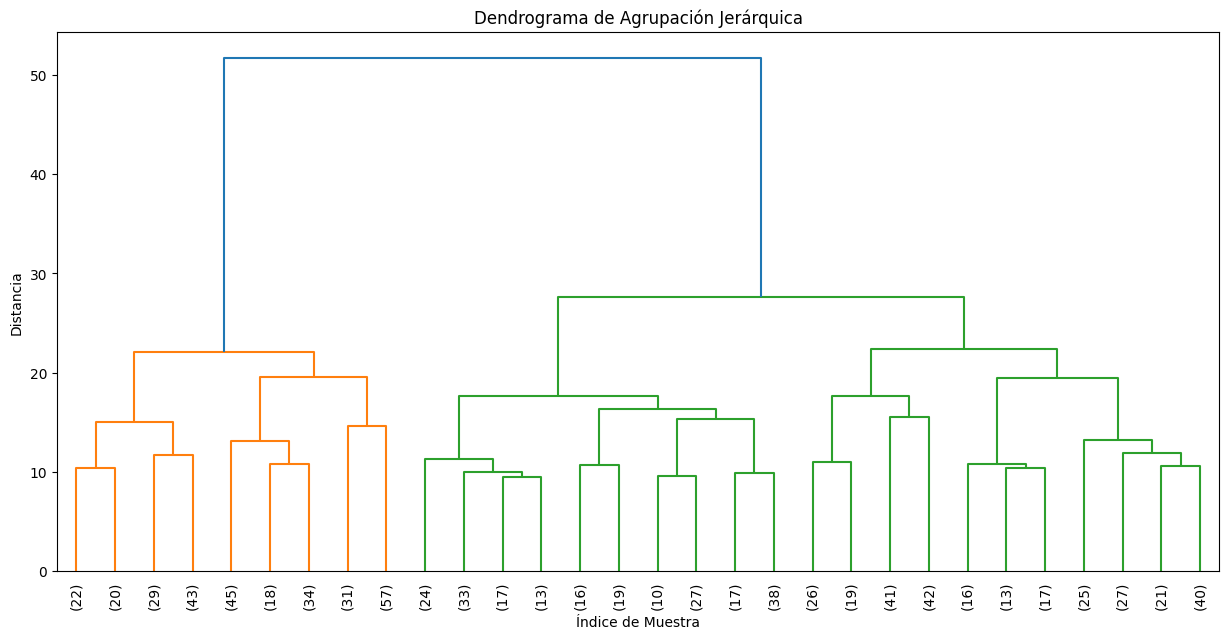

In [ ]:
# Calcular la matriz de enlace para X_train
# 'ward' minimiza la varianza dentro de cada clúster.
Z = linkage(X_train, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(15, 7))
plt.title('Dendrograma de Agrupación Jerárquica')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.show()



Matriz de Confusión para la Agrupación Jerárquica:


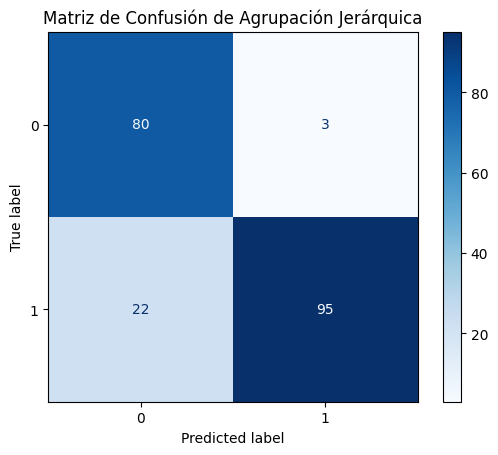

Porcentaje de Precisión de Agrupación Jerárquica: 89.26%


In [ ]:
cm_hierarchical = confusion_matrix(Y_test, mapped_predicted_labels_hierarchical)
print("Matriz de Confusión para la Agrupación Jerárquica:")
display_hierarchical = ConfusionMatrixDisplay(confusion_matrix=cm_hierarchical, display_labels=np.unique(Y_test))
display_hierarchical.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión de Agrupación Jerárquica')
plt.show()

report_hierarchical = classification_report(Y_test, mapped_predicted_labels_hierarchical, output_dict=True)
precision_hierarchical = report_hierarchical['weighted avg']['precision'] * 100

print(f"Porcentaje de Precisión de Agrupación Jerárquica: {precision_hierarchical:.2f}%")

In [ ]:
# Formulario del usuario
Edad = 49    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"          # @param ["0", "1", "2", "3"]
PresionArterial = 101     # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 227           # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "1"            # @param ["0", "1"]
Electrocardiograma = "2"  # @param ["0", "1", "2", "3"]
FrecuenciaCardiacaMaxima = 112  # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "1"       # @param ["0", "1"]
Depresion = 1.3           # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "3"           # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"     # @param ["0", "1", "2", "3"]

# Conversión de variables categóricas
Genero = 1 if Genero == "Masculino" else 0

# Construcción del DataFrame del usuario
datos_usuario = pd.DataFrame([{
    'age': Edad,
    'gender': Genero,
    'chestpain': int(DolorPecho),
    'restingBP': PresionArterial,
    'serumcholestrol': Clesterol,
    'fastingbloodsugar': int(Glucemia),
    'restingrelectro': int(Electrocardiograma),
    'maxheartrate': FrecuenciaCardiacaMaxima,
    'exerciseangia': int(AnginaDePecho),
    'oldpeak': Depresion,
    'slope': int(Pendiente),
    'noofmajorvessels': int(VasosCAfectados),
}])

# Validación institucional de columnas
assert list(datos_usuario.columns) == list(X_train.columns), \
    "Las columnas del usuario no coinciden con las del dataset"

# Validación de tipos numéricos
assert datos_usuario.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), \
    "El DataFrame del usuario contiene columnas no numéricas"

# Transformación del dato del usuario con el escalador ya entrenado
datos_usuario_escalado = datos_usuario.copy()
datos_usuario_escalado[columnas_numericas] = scaler.transform(datos_usuario[columnas_numericas])


# Predicción del grupo del usuario con el modelo ya entrenado
grupo_usuario = kmeans.predict(datos_usuario_escalado)

# Interpretación del resultado
if grupo_usuario[0] == 1:
    print("El usuario fue agrupado en el grupo 1. Tiene características similares a ese grupo.")
else:
    print("El usuario fue agrupado en el grupo 0. Tiene características similares a ese grupo.")

# Registro institucional del resultado
with open("log_clustering_usuario.txt", "a") as f:
    f.write(f"Edad: {Edad}, Grupo asignado: {grupo_usuario[0]}\n")

El usuario fue agrupado en el grupo 1. Tiene características similares a ese grupo.


In [ ]:
# Crear tabla con las variables ya definidas
from IPython.display import display
display(df)
data = {
    "Modelo": ["K-means", "Hierarchical Clustering"],
    "Tiempo Entrenamiento (s)": [training_timeK, training_time_hierarchical],
    "Tiempo Prediccion (s)": [prediction_time_kmeans, prediction_time_cluster],
    "Precisión (%)": [precision_kmeans,  precision_hierarchical]
}


,Modelo,Tiempo Entrenamiento (s),Tiempo Prediccion (s),Precisión (%)
0,K-means,0.059464,0.004949,94.569461
1,Hierarchical Clustering,0.042739,0.042412,89.258203


Comentarios Finales:

Para evitar el sesgo de datos y fomentar la imparcialidad de los modelos, decidimos que la manera mas efectiva de trabajar con modelos no supervisados es realizar el escalado de los datos del tipo ordinal, para luego, pasar a los modelos los datos escalados más los datos booleanos y así permitir a los modelos realizar el agrupamiento en dos grupos: Sanos y Enfermos.

Luego de verificar el comportamiento de los modelos, observamos que, el rendimiento de los mismos dependen, en parte, de la cantidad de columnas o variables que deban analizar.

Dado que el data set que nos encontramos trabajando posee varias columnas con síntomas y especificaciones a tener en cuenta para la predicción, el modelo que mejor se desempeña para realizar el diagnóstico del paciente es el K-Means.

Es importante mencionar que la predicción en el modelo K-Means es más sencilla, mientras que el clustering jerárquico, aunque más riguroso, tiende a ser un proceso más manual en su aplicación e interpretación.
